<a href="https://colab.research.google.com/github/arthuraaL/100-Days-of-ML-Code/blob/main/Decision%20Tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Loading dataset



In [12]:
data_url = 'https://raw.githubusercontent.com/arthuraaL/100-Days-of-ML-Code/main/Data/diabetes.csv'
df_train = pd.read_csv(data_url)

## Data analysis

In [13]:
# view the dimensions of the data
df_train.shape

(768, 9)

In [14]:
# preview the dataset
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# summary of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df_train.describe()

# There's no missing value, as we can check in count row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df_train['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Handling missing data

We can confirme that there are no missing values in the dataset.

In [25]:
print(f'Is missing values in the training data? {df_train.isnull().sum().values.any()}')

Is missing values in the training data? False


## Feature selection

In [26]:
X = df_train.drop(columns='Outcome')
y = df_train.Outcome

## Splitting the dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [28]:
# dimensions of the dataset after splitting
print(f'X train has shape: {X_train.shape}')
print(f'y train has shape: {y_train.shape}')
print(f'X test has shape: {X_test.shape}')
print(f'y test has shape: {y_test.shape}')

X train has shape: (537, 8)
y train has shape: (537,)
X test has shape: (231, 8)
y test has shape: (231,)


In [29]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
590,11,111,84,40,0,46.8,0.925,45
692,2,121,70,32,95,39.1,0.886,23
492,4,99,68,38,0,32.8,0.145,33
205,5,111,72,28,0,23.9,0.407,27
709,2,93,64,32,160,38.0,0.674,23


## Decision tree classifier

Let's build a Decision Tree model using [gini index](https://bambielli.com/til/2017-10-29-gini-impurity/#:~:text=Gini%20Impurity%20is%20a%20measurement,labels%20from%20the%20data%20set.) as the criterion.

In [44]:
# Create an object
clf = DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the modelimport graphviz 
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

## Evaluating the model


In [45]:
print(f'Accuracy using gini-index: {metrics.accuracy_score(y_test, y_pred}'))

Accuracy using gini-index: 0.714


## Checking for overfitting/underfitting

In [46]:
print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Test score: {clf.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.7142857142857143


## Visualizing Decision Trees

[Text(379.4176962209302, 681.4414285714286, 'X[1] <= 127.5\ngini = 0.45\nsamples = 537\nvalue = [353, 184]'),
 Text(175.79433139534885, 630.9642857142857, 'X[7] <= 28.5\ngini = 0.309\nsamples = 346\nvalue = [280, 66]'),
 Text(81.51017441860465, 580.4871428571428, 'X[5] <= 30.95\ngini = 0.155\nsamples = 201\nvalue = [184, 17]'),
 Text(29.197674418604652, 530.01, 'X[0] <= 7.5\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(19.46511627906977, 479.5328571428571, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(9.732558139534884, 429.05571428571426, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(29.197674418604652, 429.05571428571426, 'X[0] <= 2.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(19.46511627906977, 378.5785714285714, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(38.93023255813954, 378.5785714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(38.93023255813954, 479.5328571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),


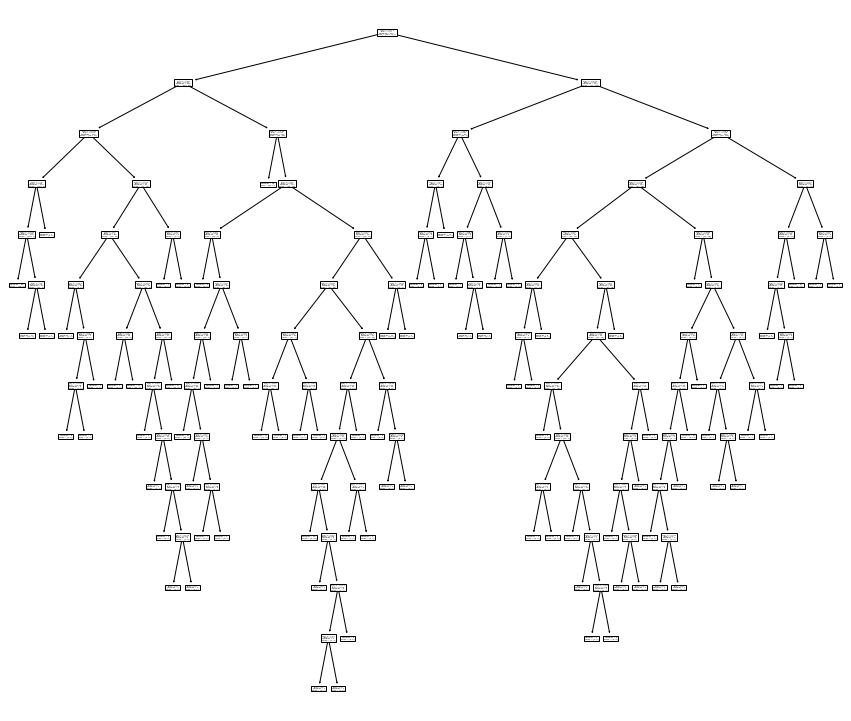

In [58]:
plt.figure(figsize=(15, 13))

tree.plot_tree(clf.fit(X_train, y_train))

## Optimizing Decision Tree Performance